In [1]:
import warnings
warnings.filterwarnings('ignore')
import copy

In [2]:
def colRead(l, colNum):
    return [array[colNum] for array in l]

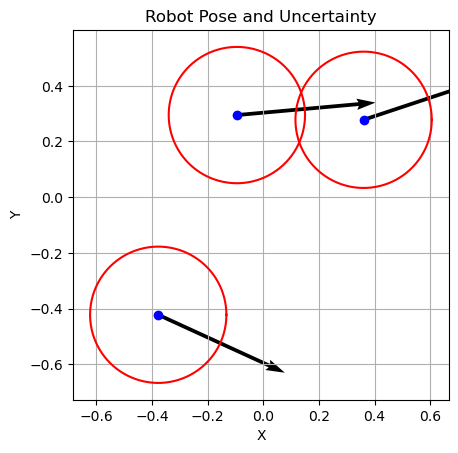

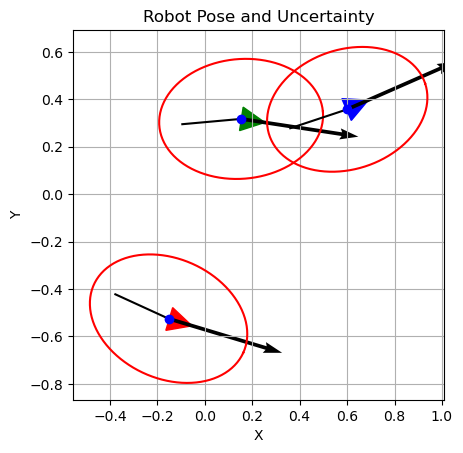

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from Robot_w_dist_JLATT import Robot_w_dist_JLATT

color = ['green', 'blue', 'red','black']

# def main():
np.random.seed(492)  # for reproducibility

dt = 0.5
t_end = 25
t = np.arange(0, t_end + dt, dt)

x0 = np.array([1, 1, 0])

robot_num = 3
robot_set = [0 for _ in range(robot_num)]

sensor_variances = np.array([0.1, 0.1, 0.1])  # variances = [v_abs; v_r; v_t]
sensor_limits = np.array([999, 999])  # max_distances = [max_z_r; max_z_t]
sensor_prob = np.array([1, 1])
sensor_data = [sensor_variances, sensor_limits, sensor_prob]

max_connection_distance = 10
link_probabilities = np.array([0.7, 0.7])  # [abs_message_prob; rel_message_prob]
connection_data = [max_connection_distance, link_probabilities]

e_var0 = 0.01  # initial estimated error from the true position
process_var = 0.01  # variance of the process white noise
stat_data = [e_var0, process_var]

for j in range(robot_num):
    x0 = np.array([-1 + 2 * np.random.rand(),
                -1 + 2 * np.random.rand(),
                -np.pi / 4 + np.pi / 2 * np.random.rand()])
    robot_set[j] = Robot_w_dist_JLATT(x0, j, stat_data, sensor_data, connection_data, 0)

# Visualization
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Robot Pose and Uncertainty')

for j in range(robot_num):
    robot_set[j].draw_estimate()

plt.show()

# Propagation
for j in range(robot_num):
    robot_set[j].update(dt)

for j in range(robot_num):
    robot_set[j].simple_rel_meas(robot_set, t[0])

for j in range(robot_num):
    robot_set[j].simple_rel_com(robot_set, t[0])

fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Robot Pose and Uncertainty')


for j in range(robot_num):
    ax.plot(colRead(robot_set[j].true_path, 0), colRead(robot_set[j].true_path, 1),  'k')
    triangle = robot_set[j].draw(-1)
    ax.fill(triangle[0], triangle[1], color=color[j])
    robot_set[j].draw_estimate()

plt.show()


In [4]:
robot_set[0].true_path

[array([-0.09481501,  0.29488703,  0.08985759]),
 array([0.15417637, 0.31732121, 6.13055925])]

In [5]:
# Correction
for j in range(robot_num):
    robot_set[j].simple_corrections(t[0])

In [6]:
robot_set

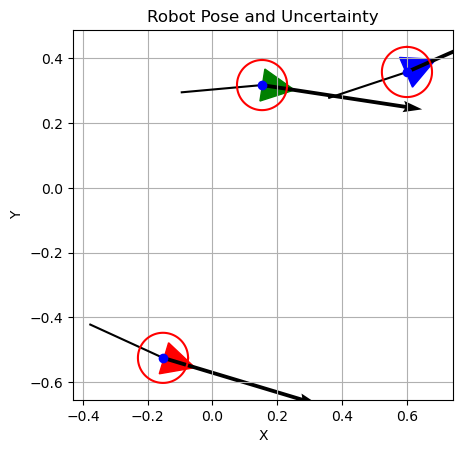

In [7]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Robot Pose and Uncertainty')

for j in range(robot_num):
    ax.plot(colRead(robot_set[j].true_path, 0),  colRead(robot_set[j].true_path, 1), 'k')
    triangle = robot_set[j].draw(-1)
    ax.fill(triangle[0], triangle[1], color=color[j])
    robot_set[j].draw_estimate()

plt.show()

# Simulation over time
robots_in_time = []


# for i = 1:length(t)
#     % update robot position
#     for j = 1:robot_num
#         robot_set(j) = robot_set(j).update(dt);
#     end

#     % update robot sensor readings
#     for j = 1:robot_num
#         if simple
#             robot_set(j) = robot_set(j).simple_rel_meas(robot_set,t(1));
#         else 
#             robot_set(j) = robot_set(j).update_meas(robot_set,t(i));
#         end
#     end

#     % update robot communication
#     for j = 1:robot_num
#         if simple 
#             robot_set(j) = robot_set(j).simple_rel_com(robot_set,t(1));
#         else
#             robot_set(j) = robot_set(j).update_com(robot_set,t(i));
#         end
#     end

#     % correct with information
#     for j = 1:robot_num
#         if simple
#             robot_set(j) = robot_set(j).simple_corrections(t(1));
#         else
#             robot_set(j) = robot_set(j).corrections_from_com(t(i));
#         end
#     end

#     robots_in_time = [ robots_in_time; robot_set];
# end

simple = False


for i in range(len(t)):
    for j in range(robot_num):
        robot_set[j].update(dt)

    for j in range(robot_num):
        if(simple):
            robot_set[j].simple_rel_meas(robot_set,t[0])
        else:
        #    print("Robot",j)
           robot_set[j].update_meas(robot_set,t[i])

    for j in range(robot_num):
        if(simple):
            robot_set[j].simple_rel_com(robot_set,t[1])
        else:
            robot_set[j].update_com(robot_set,t[i])

    for j in range(robot_num):
        if(simple):
            robot_set[j].simple_corrections(t[1])
        else:
            robot_set[j].corrections_from_com(t[i])
            
    robots_in_time.append(copy.deepcopy(robot_set))


[array([9.46660654, 9.56024508, 9.55293288]), array([-6.90743493, -6.96852359, -6.85695956])]
[array([11.11626228, 11.22523321, 11.17985604]), array([-1.65425241, -1.67925914, -1.57707836])]
[array([5.93439117, 5.84309677, 5.84624191]), array([8.12274503, 8.18728441, 8.07552526])]


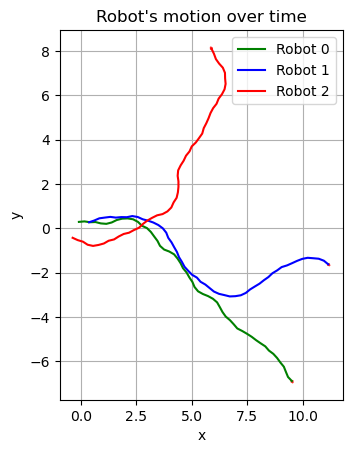

In [8]:
# Graphs
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Robot's motion over time")
ax.grid(True)

for j in range(robot_num):
    ax.plot(colRead(robot_set[j].true_path, 0),  colRead(robot_set[j].true_path, 1), color=color[j], label=f'Robot {j}')
    triangle = robot_set[j].draw(-1)
    print(triangle)
    ax.fill(triangle[0], triangle[1], color='red', alpha=0.5)
    triangle = robot_set[j].draw(len(colRead(robot_set[j].true_path, 0)) - 1)
    ax.fill(triangle[0], triangle[1], color='red', alpha=0.5)

ax.legend()
plt.show()


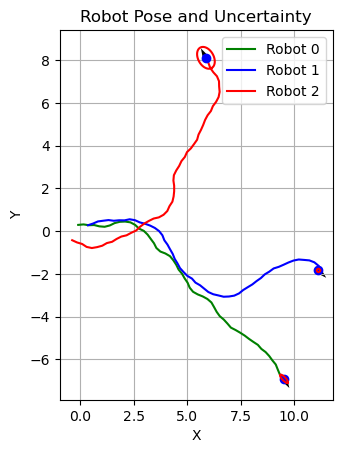

In [9]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Robot Pose and Uncertainty')

for j in range(robot_num):
    ax.plot(colRead(robot_set[j].true_path, 0),  colRead(robot_set[j].true_path, 1), color=color[j], label=f'Robot {j}')
    robot_set[j].draw_estimate()

plt.legend()
plt.show()


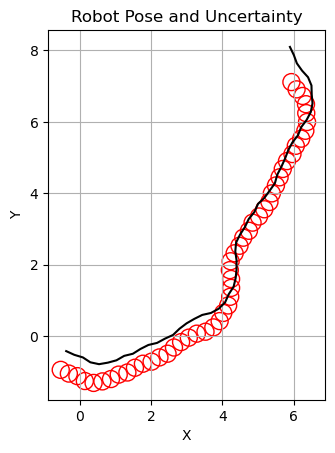

In [18]:

fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Robot Pose and Uncertainty')

robot_to_check = 2

ax.plot(colRead(robots_in_time[-1][robot_to_check].true_path, 0), colRead(robots_in_time[-1][robot_to_check].true_path, 1), 'k')
x = colRead(robots_in_time[-1][robot_to_check].true_path, 0)
y = colRead(robots_in_time[-1][robot_to_check].true_path, 1)
for i in range(len(robots_in_time)):
    plt.scatter((robots_in_time[i][robot_to_check].Pose_est[0] + x[i]),(robots_in_time[i][robot_to_check].Pose_est[1] + y[i]), color='none', edgecolors='red', s=150, linewidths=1)


plt.show()

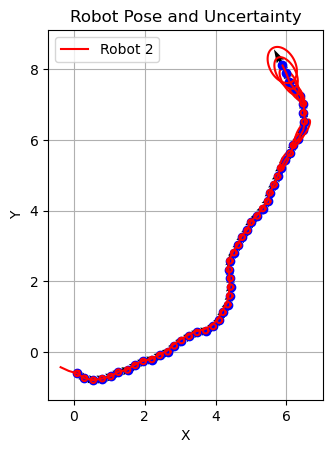

In [11]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Robot Pose and Uncertainty')

for i in range(len(robots_in_time)):
    robots_in_time[i][robot_to_check].draw_estimate()

ax.plot(colRead(robots_in_time[-1][robot_to_check].true_path, 0), colRead(robots_in_time[-1][robot_to_check].true_path, 1), color=color[j], label=f'Robot {robot_to_check}')
plt.legend()
plt.show()